In [1]:
import pandas as pd
print(pd.__version__)  # Prints the pandas version

2.3.2


In [2]:
df = pd.read_csv("penetracion_internet.csv")

In [5]:
df.info(show_counts=True, memory_usage=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35578 entries, 0 to 35577
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AÑO                           35578 non-null  int64  
 1   TRIMESTRE                     35578 non-null  int64  
 2   COD_DEPARTAMENTO              35578 non-null  int64  
 3   DEPARTAMENTO                  35578 non-null  object 
 4   COD_MUNICIPIO                 35578 non-null  int64  
 5   MUNICIPIO                     35578 non-null  object 
 6   No. ACCESOS FIJOS A INTERNET  35578 non-null  int64  
 7   POBLACIÓN DANE                35578 non-null  int64  
 8   INDICE                        35578 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.4+ MB


In [4]:
# Limpieza de la columna INDICE
df["INDICE"] = df["INDICE"].str.replace("%", "", regex=False)  # quitar %
df["INDICE"] = df["INDICE"].str.replace(",", ".", regex=False) # cambiar coma por punto
df["INDICE"] = df["INDICE"].astype(float)


In [6]:
df["PENETRACION_CALCULADA"] = (df["No. ACCESOS FIJOS A INTERNET"] / df["POBLACIÓN DANE"]) * 100


In [7]:
print(df["AÑO"].unique())
print(df["DEPARTAMENTO"].unique())
df.describe()


[2016 2020 2017 2018 2019 2015 2023 2022 2021]
['META' 'BOYACÁ' 'CUNDINAMARCA' 'TOLIMA' 'ANTIOQUIA' 'CALDAS' 'NARIÑO'
 'CÓRDOBA' 'VALLE DEL CAUCA' 'CASANARE' 'BOLÍVAR' 'CAUCA' 'ATLÁNTICO'
 'NORTE DE SANTANDER' 'SANTANDER' 'HUILA' 'PUTUMAYO' 'CHOCÓ' 'RISARALDA'
 'QUINDÍO' 'CESAR' 'CAQUETA' 'MAGDALENA' 'SUCRE' 'ARAUCA' 'VICHADA'
 'LA GUAJIRA' 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'
 'GUAINÍA' 'GUAVIARE' 'AMAZONAS' 'VAUPÉS' 'BOGOTÁ D.C.']


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,COD_MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE,PENETRACION_CALCULADA
count,35578.000000,35578.000000,35578.000000,35578.000000,3.557800e+04,3.557800e+04,35578.000000,35578.000000
mean,2019.260133,2.500084,37.779920,38211.710355,6.633805e+03,4.449131e+04,4.498820,4.498781
std,2.331155,1.117849,26.171136,26152.921166,6.706573e+04,2.611701e+05,5.976251,5.976281
min,2015.000000,1.000000,5.000000,5001.000000,1.000000e+00,2.620000e+02,0.000000,0.004452
25%,2017.000000,2.000000,15.000000,15664.000000,5.200000e+01,6.866000e+03,0.780000,0.781191
50%,2019.000000,3.000000,25.000000,25805.000000,2.420000e+02,1.320450e+04,2.290000,2.289339
75%,2021.000000,3.000000,66.000000,66075.000000,1.078000e+03,2.779575e+04,5.680000,5.681009
max,2023.000000,4.000000,99.000000,99773.000000,2.638171e+06,7.907281e+06,122.030000,122.026391


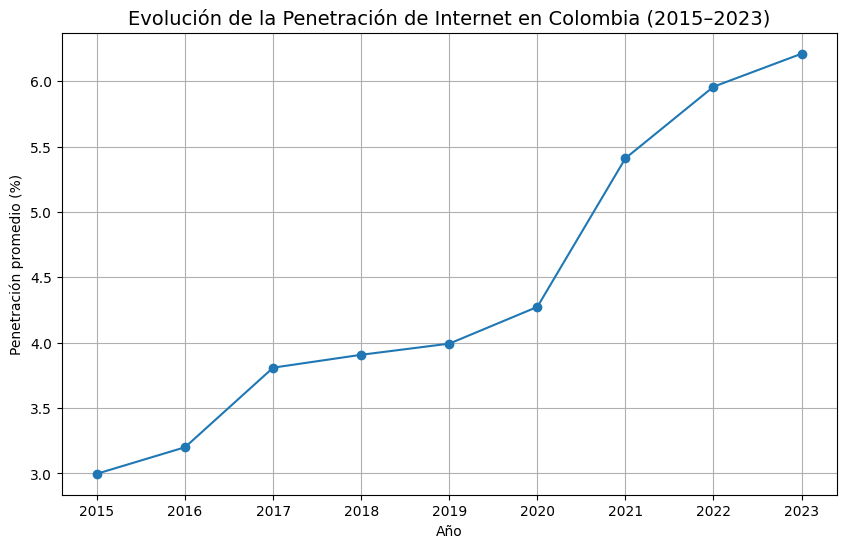

In [8]:
import matplotlib.pyplot as plt

# Promedio nacional de penetración por año
penetracion_anual = df.groupby("AÑO")["PENETRACION_CALCULADA"].mean()

# Gráfico de línea
plt.figure(figsize=(10,6))
plt.plot(penetracion_anual.index, penetracion_anual.values, marker="o", linestyle="-")
plt.title("Evolución de la Penetración de Internet en Colombia (2015–2023)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Penetración promedio (%)")
plt.grid(True)
plt.show()


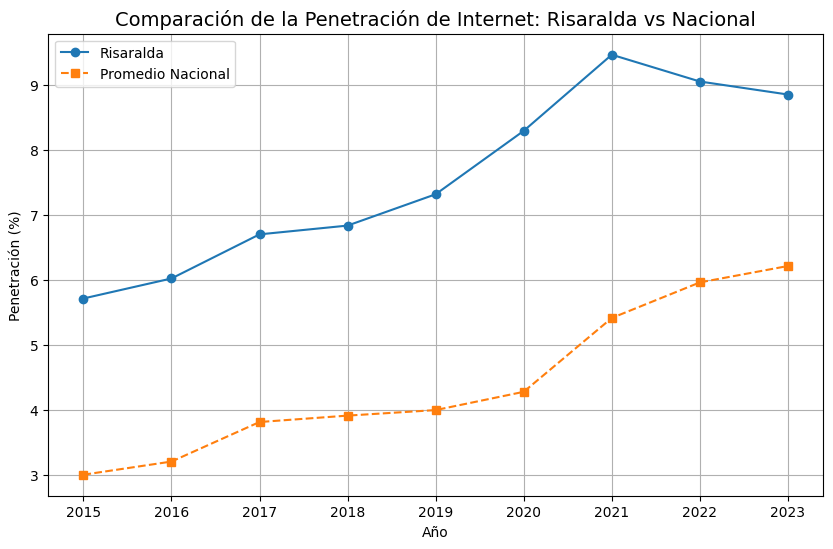

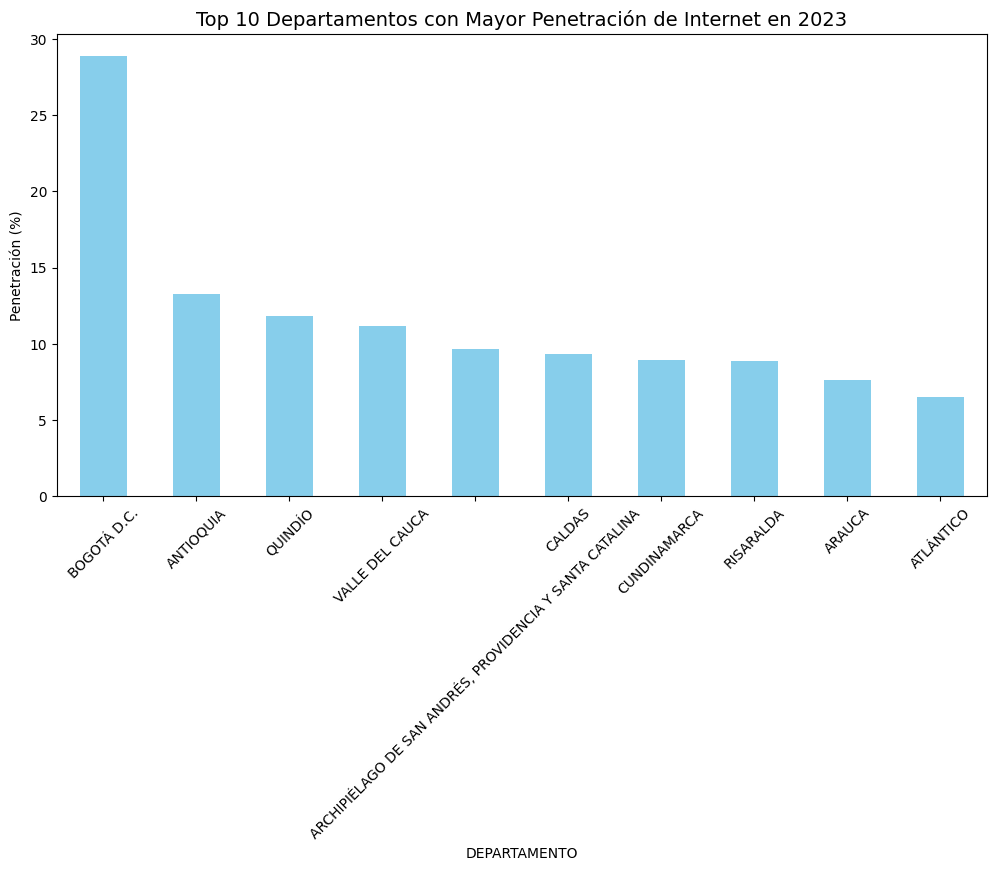

In [9]:
# Evolución de Risaralda vs promedio nacional
penetracion_risaralda = df[df["DEPARTAMENTO"] == "RISARALDA"].groupby("AÑO")["PENETRACION_CALCULADA"].mean()
penetracion_nacional = df.groupby("AÑO")["PENETRACION_CALCULADA"].mean()

plt.figure(figsize=(10,6))
plt.plot(penetracion_risaralda.index, penetracion_risaralda.values, marker="o", label="Risaralda")
plt.plot(penetracion_nacional.index, penetracion_nacional.values, marker="s", linestyle="--", label="Promedio Nacional")
plt.title("Comparación de la Penetración de Internet: Risaralda vs Nacional", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Penetración (%)")
plt.legend()
plt.grid(True)
plt.show()

# Ranking de departamentos en 2023
penetracion_2023 = df[df["AÑO"] == 2023].groupby("DEPARTAMENTO")["PENETRACION_CALCULADA"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
penetracion_2023.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Departamentos con Mayor Penetración de Internet en 2023", fontsize=14)
plt.ylabel("Penetración (%)")
plt.xticks(rotation=45)
plt.show()


In [15]:
df["INDICE"].unique()[:20]  # para ver algunos valores
df["INDICE"].dtype


dtype('float64')

In [14]:
# Si ya son números, solo renombramos para usarlos
df["PENETRACION_NUM"] = pd.to_numeric(df["INDICE"], errors="coerce")


In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


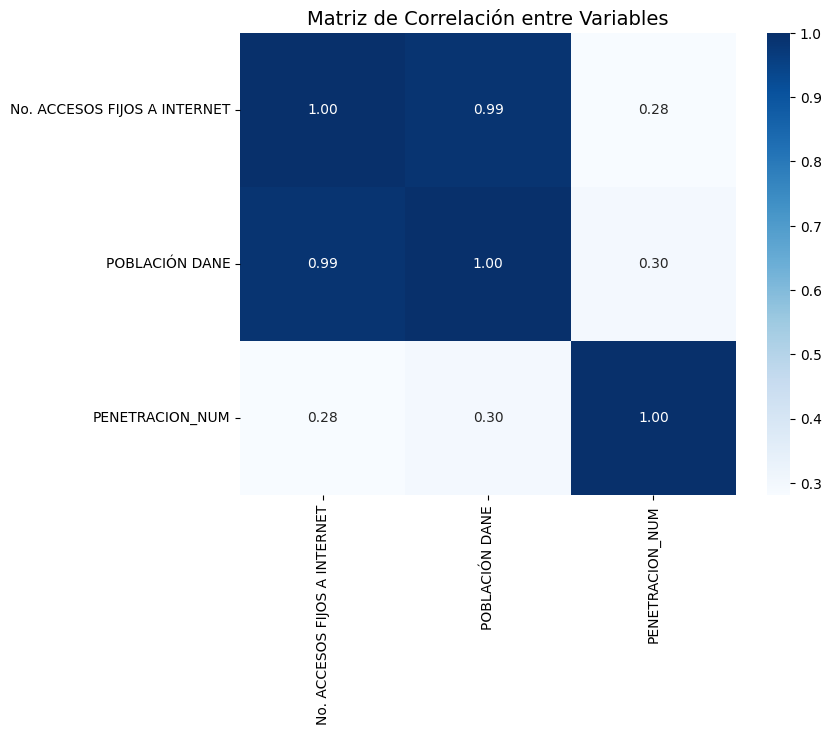

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr = df[["No. ACCESOS FIJOS A INTERNET", "POBLACIÓN DANE", "PENETRACION_NUM"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlación entre Variables", fontsize=14)
plt.show()


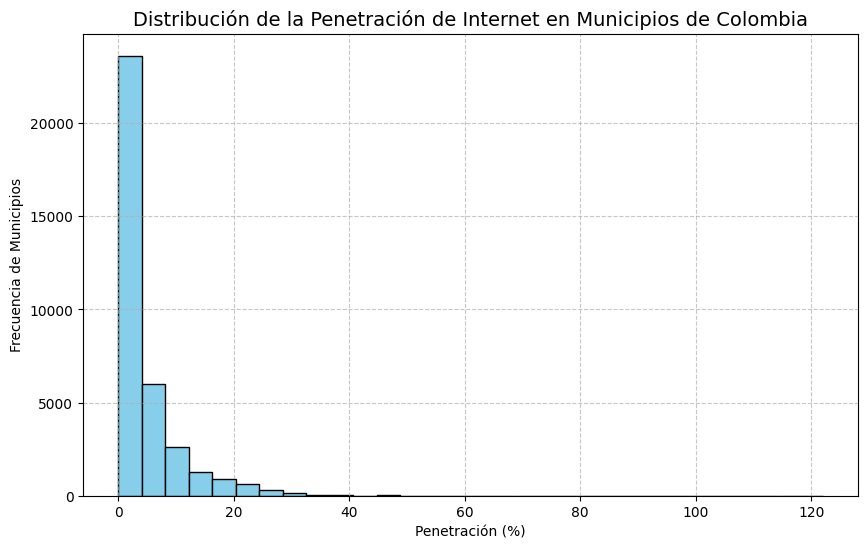

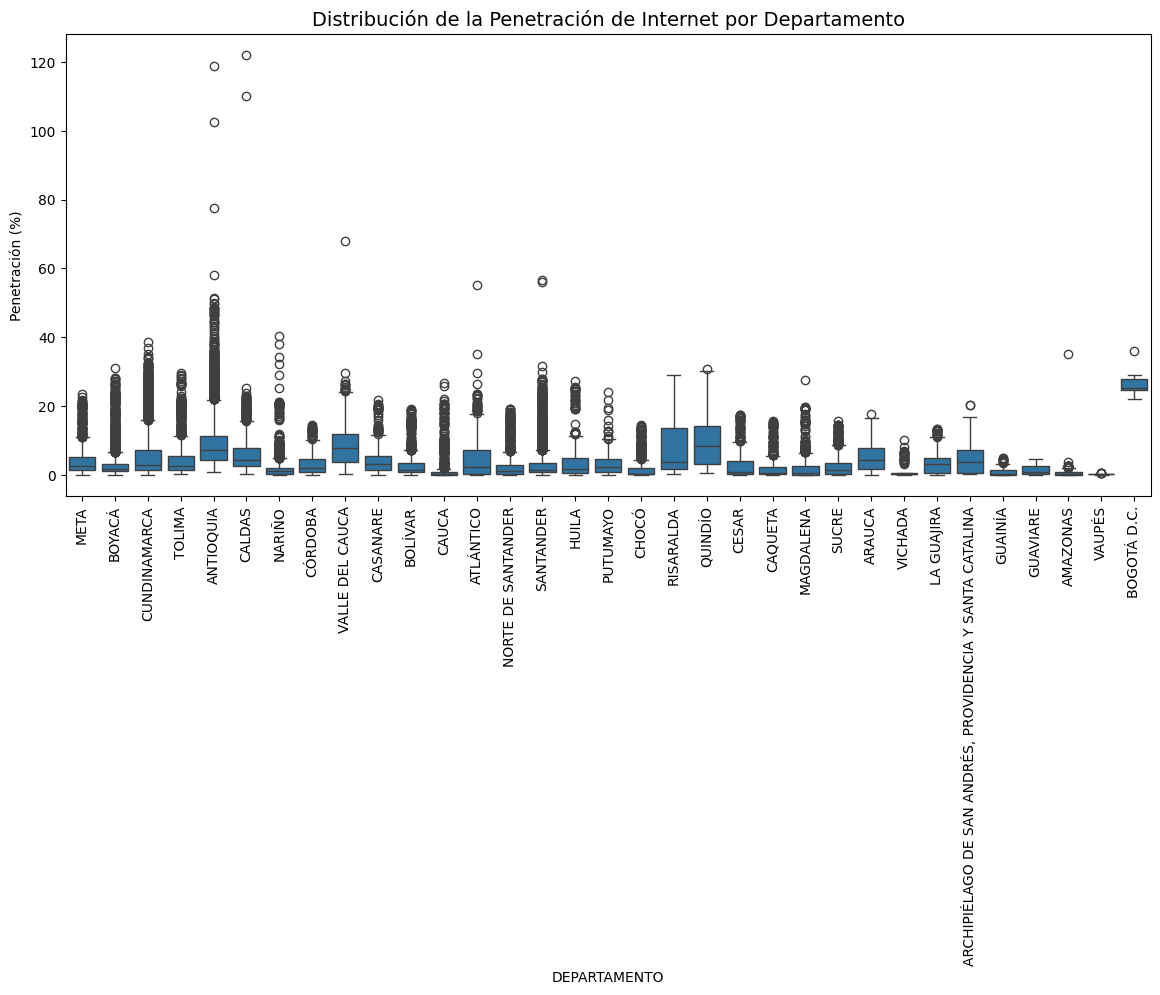

In [23]:
# Histograma de la penetración
plt.figure(figsize=(10,6))
plt.hist(df["PENETRACION_NUM"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribución de la Penetración de Internet en Municipios de Colombia", fontsize=14)
plt.xlabel("Penetración (%)")
plt.ylabel("Frecuencia de Municipios")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Boxplot por departamento
plt.figure(figsize=(14,6))
sns.boxplot(x="DEPARTAMENTO", y="PENETRACION_NUM", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de la Penetración de Internet por Departamento", fontsize=14)
plt.ylabel("Penetración (%)")
plt.show()


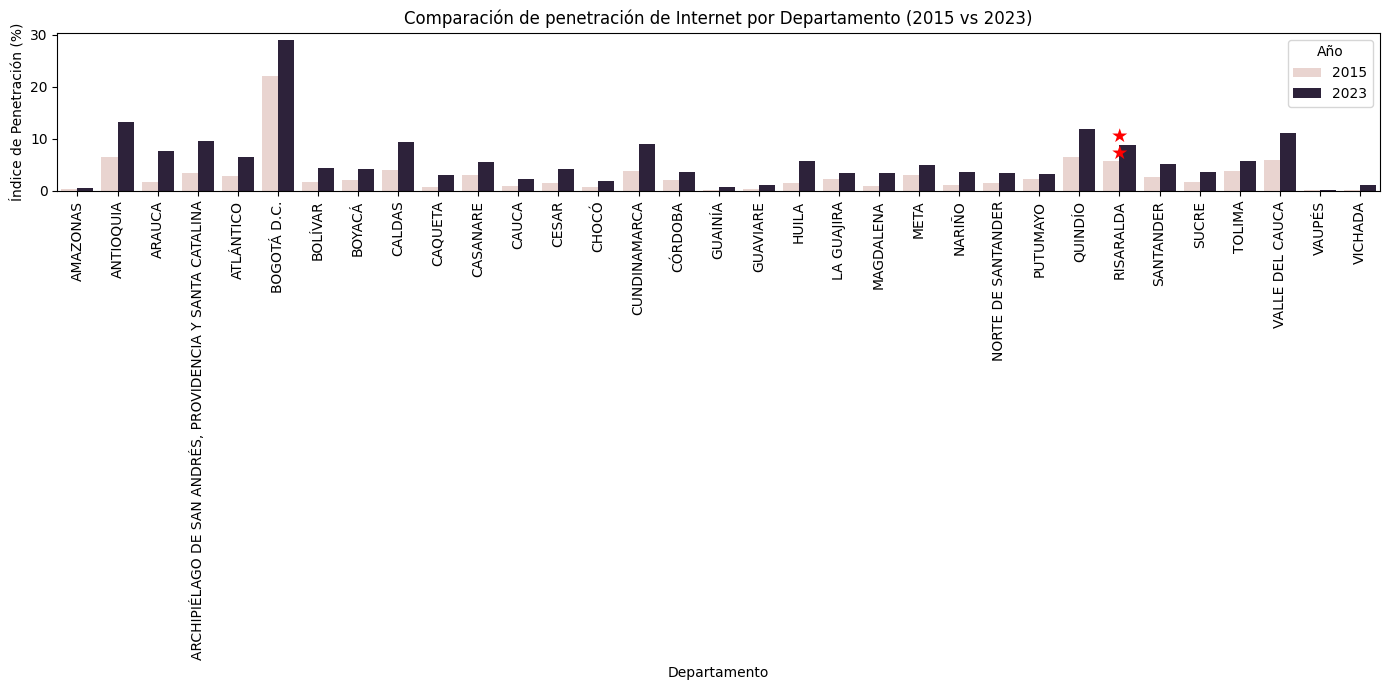

In [24]:
import matplotlib.pyplot as plt

# Filtrar los años de interés
df_comp = df[df['AÑO'].isin([2015, 2023])]

# Agrupar por año y departamento calculando la penetración promedio
df_comp_group = df_comp.groupby(['AÑO', 'DEPARTAMENTO'])['PENETRACION_NUM'].mean().reset_index()

# Gráfico comparativo
plt.figure(figsize=(14,7))
sns.barplot(data=df_comp_group, x='DEPARTAMENTO', y='PENETRACION_NUM', hue='AÑO')

# Resaltar Risaralda
for i, row in df_comp_group.iterrows():
    if row['DEPARTAMENTO'] == 'RISARALDA':
        plt.text(i % len(df_comp_group['DEPARTAMENTO'].unique()), 
                 row['PENETRACION_NUM'] + 0.5, 
                 "★", ha='center', color='red', fontsize=14)

plt.title("Comparación de penetración de Internet por Departamento (2015 vs 2023)")
plt.ylabel("Índice de Penetración (%)")
plt.xlabel("Departamento")
plt.xticks(rotation=90)
plt.legend(title="Año")
plt.tight_layout()
plt.show()


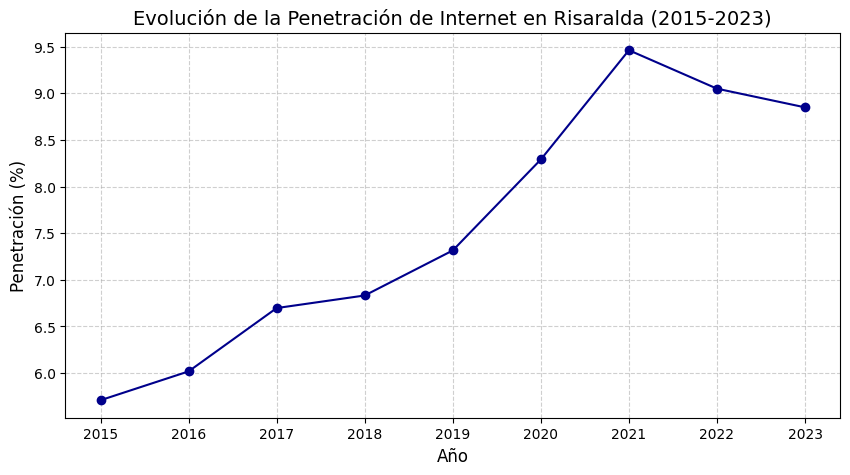

In [25]:
# Filtrar los datos solo para Risaralda
risaralda_data = df[df['DEPARTAMENTO'] == 'RISARALDA']

# Agrupar por año y calcular el promedio de penetración
evolucion_risaralda = risaralda_data.groupby('AÑO')['PENETRACION_NUM'].mean().reset_index()

# Graficar la evolución temporal
plt.figure(figsize=(10,5))
plt.plot(evolucion_risaralda['AÑO'], evolucion_risaralda['PENETRACION_NUM'], marker='o', linestyle='-', color='darkblue')

plt.title("Evolución de la Penetración de Internet en Risaralda (2015-2023)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Penetración (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
